In [2]:
a = 1

In [3]:
a = int(1)

In [10]:
id(a)

140711382655376

In [12]:
type(a)
# type이 무엇이냐? > instance를 type했더니, > 결과가 class가 나온네

int

In [16]:
type(a) # 이는 callable하고, 반환값이 int이므로 밑에 식이 작동한다.

int

In [17]:
b = type(a)(3) # type class 내의 a ; int, 그것 안의 3 -> 3

In [18]:
b 

3

In [19]:
type(int) # class를 type > type : metaclass

type

In [21]:
type(type)
# type이라는 것은 class와 같다. 
# 우리가 만든 클래스는 이미 object에 있는 것을 조합해서 만든 것이다! 

type

In [23]:
data type = class # class는 새로운 데이터 타입이구나!
# class를 만드는 것은 나만의 새로운 데이터 타입을 만드는 것이구나!
# type은 class를 만드는 class이다. (처음에 자동으로 부여되는 meta class)

In [5]:
c = a.__class__(4)

In [7]:
c # a.__class__ 는 meta class인 type이다.

4

In [ ]:
class A(object):   
    a = 1

- 보통 __class__ 를 사용하면 인스턴스 또는 클래스에 대한 부모 클래스가 나와야 하는데,
-  우리가 조합한 class는 이미 object에 있는 것을 조합해서 만든 것이기 때문에 a.__class__ 일시 int가 나온다.

In [29]:
a.__class__ 



int

In [30]:
type(a)
# typeE

int

In [31]:
class A:
    pass

class B(A):
    pass

class C(A):
    pass

class D(A,B):
    pass


TypeError: Cannot create a consistent method resolution
order (MRO) for bases A, B

- 파이썬은 내가 순서를 해결 할 수 없으면 아예 못만든다! ->> MRO 문제가 발생하면 바로 오류가 뜨게 만들었다.
- 다중 상속의 첫 번째 문제점은 MRO가 해결해 준다.(바로 에러가 떠서 바꿀 수 있게 해준다)

In [16]:
class A:
    pass

class B(A):
    pass

class C(A):
    pass

class D(B,A):
    pass

# 순서에 따라서 되는게 안되는게 있다.
# 다

In [12]:
D.mro() # 

[__main__.D, __main__.B, __main__.A, object]

In [46]:
class A:
    def __init__(self):
        print('A')

class B(A):
    def __init__(self): 
        A.__init__(self) # A에 있는 특정 기능을 사용하기 위해서 이렇게 했다.
        print('B')


class C(A):
    def __init__(self):
        A.__init__(self) # 이러면 꼭 상속을 할 필요는 없다. but 일단은.
        print('C')

class D(B,C):
    def __init__(self):
        B.__init__(self)  # 각각 따로 부모를 실행시켜준다.
        C.__init__(self) 
        print('D')

In [47]:
d = D()
# 첫번째 A가 출력되고, B가 출력되고 완료되었다.
# 이제 C가 똑같은 방식으로 실행됬더니, 이애가 다시 A로 가고, A 찍히고 C 찍혔다.
# 마지막 D가 나왔다.
# 문제점 : 만약 A가 B의 내용을 뒤엎는 내용이라면, 2번 실행되어진다.
# 이를 해결하기 위해서, super()을 제공한다.

A
B
A
C
D


In [48]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [49]:
class A:
    def __init__(self):
        print('A')

class B(A):
    def __init__(self): 
        super().__init__() 
        # super() 부모의 instance이기 때문에 self를 생략한다. python3부터
        print('B')

class C(A):
    def __init__(self):
        super(C, self).__init__() # python2부터 (위와 의미는 같다)
        print('C')

class D(B,C):
    def __init__(self):
        super().__init__() 
        # 2개의 부모를 가지고 있어도 하나만 쓰면 된다. 동시에 부모를 실행시켜준다. 
        print('D')

In [50]:
d = D() # super() 가 다중 상속 관점에서 중복실행 막아버렸네!

A
C
B
D


In [51]:
D.mro()


[__main__.D, __main__.B, __main__.C, __main__.A, object]

-  stack구조로 들어가서(D가 들어가고, B가 들어가고 .....) 하나씩 진행되므로,, A -> C -> B -> D 순서대로
-  super()은 MRO 기반으로 복잡한 상속 체계에서 중복을 걸러낸다. (처음에 MRO함수가 만들어져 있고, class만들어 질때 MRO가 생성된다.)
-  중복 걸려주고, 부모의 인스턴스로 반환하는 것이 super()이다.
-  super()는 상속체계를 모두 흝는다. 복잡한 상속체계 관련된것들 흝어본다.

- 그럼 super은 중복 없이 부모의 instance를 수행해주는 명령어인가요?
- 중복이 있으면, 중복을 걸러내야지고, 부모의 instace(이때는 __init__)를 반환한다. 
- 인스턴스  : 인스턴스(instance)란 객체 지향 프로그래밍(OOP)에서 클래스(class)에 소속된 개별적인 객체를 말한다
- a = A() 에서 a도 인스턴스, __init__도 인스턴스... (모두 속하므로)

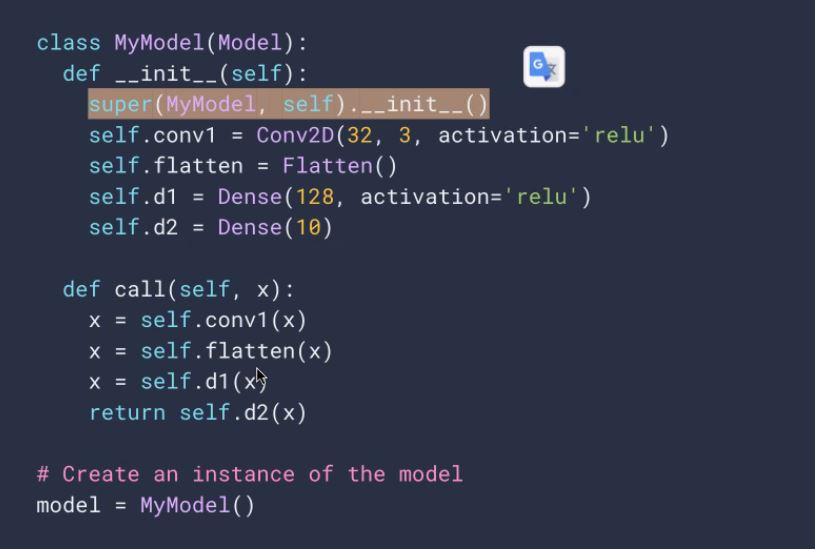

In [62]:
# __tensorflow__는 __init__, call 로 쓰여서 closure이다.
from IPython.display import Image
Image('init_call_closure.jpg')

# 말이 call이지만, 클로저 형태로 call이 나와있다. clore에서 앞에 것을 받아서, 밑에서 해결한다.
# MyModel()(x) 이므로 함수 안에 함수 처럼 클로저로 생각

- 객체 지향의 composition 형식 (밑 참조)
-  남의 클래스의 메서드  가져온다 ->> composition (Conv2D) 왜 composition 할까??? (책 참조)
-  함수형 패러다임에서는 클로저(Conv2D 클래스에서 (__call__)를 접근), 객체지향에서는 composition pattern(self.conv1)
-  이것이 다른 클래스 (Dense) 불러옴 >> __getattr__을 활용해서도 만들 수 있다. >> 어떻게 로직을 만드냐에 따라서 매우 유연!

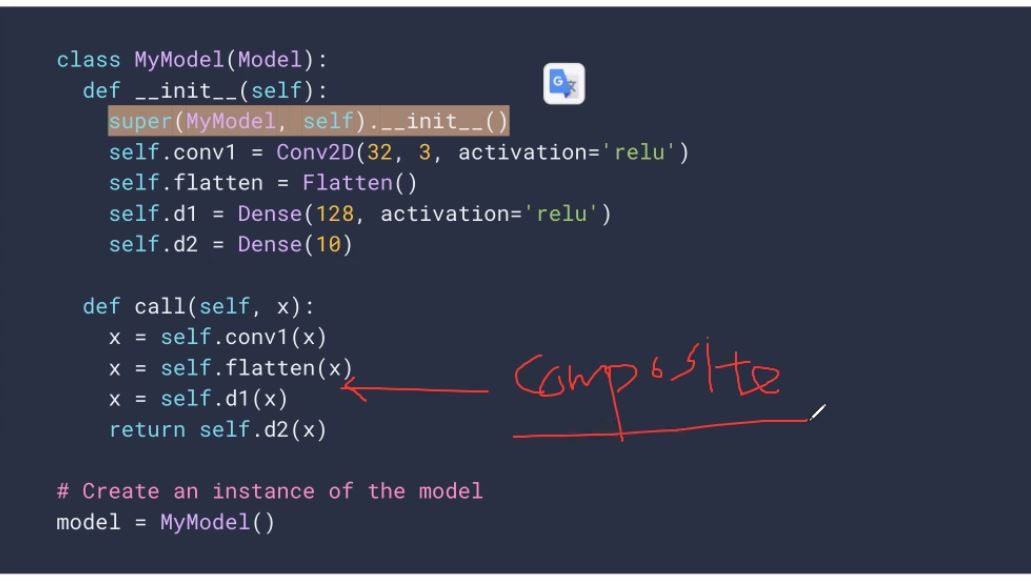

In [65]:
Image('composite.jpg')


In [ ]:
class C:
    def __init__(self,m):
        self.m = m
    def __call__ # 클로저...! 클래스에서 함수를 또 반환

In [ ]:
composition pattern <- oop

In [66]:
# 상속에도 활용 가능

In [ ]:
#####################################클래스 구분 ##################################

In [21]:
class A:
    def __init__(self):
        self.x = 1 
    def y(self):
        print('y')

In [22]:
class B(A):
    pass

# (다중) 상속에 문제점이 있다.
# 다중 상속은 휼륭하지만(super()사용해서 알 수는 있지만), 
# 복잡하면 복잡할 수록 이해하기가 어려워진다 >> 체계자체가 복잡해진다.


In [23]:
# 그러므로 이런 테크닉이 사용되어질 수 있다 : 
# 상속을 안한다 >> compositon 한다 (남의 클래스 인스턴스를 가져온다)
class C: 
    # 문제점 : 하나하나 다 어떻게 구현하나???
    def __init__(self): 
        self.t = A()


    def y(self):
        self.t.y()
        

In [24]:
class D:
    a = 1
    b = 1
    
    def __getattr__(self,x) :
        # AttributeError가 발생할 때 실행. 결과 값이 없을 때 해당 없는 이름 x가 나오도록 실행
        print(x)
        

In [25]:
d = D()

In [26]:
d.c 
#결과값이 없으면 AttributeError가 나옴.

c


In [40]:
class CC:
    def __init__(self):
        self.t = A()
        
    def __getattr__(self,x): # AttributeError가 발생할 때 실행.
        return getattr(self.t, x) 
# 위와 혼동됨 __가 안붙은 getattr은 특정 클래스 인스턴스에서 가져오라는 뜻  (위에서 지정함)
# (self.t 가 A클래스이므로, A클래스에서 attribute error가 뜬 인스턴스(변수 or 메서드)를 가지고 오라는 뜻)
# 실제 에러가 발생하면 (내가 상속한 것처럼 생각했기 때문에)
# cc.t가 없으니깐... 상속된 것처럼 한 것이기때문에 A()의 t를 가지고 와라!!!!!! 
# 상속 체계가 복잡하면 부모가 달라지면 처음부터 처리를 해야할 수도 있다. (유지보수가 어렵다)
# 그러므로 상속 대신 composition 을 사용한다. -> 부모의 영향을 덜 받기 위해서.
    # (attribute 오류가 뜰때 __getattr__를 실행!)
# 이 두 줄로 없는 애들은 모두 A()에서 들고 온다 >> 상속과 같다!!!
# 이때 x는 CC에서 호출시 없는 인스w턴스를 의미! (여기서는 y())

In [41]:
c = CC()

-  composition 사용해서 완전 상속처럼 사용할 수 있는 테크닉
- 완전 유연하게 사용할 수 있어서, 내가 closure 형태 또는 위의 방식(용어적 관점; composition pattern)을 사용해서 많은 곳에 쓰인다.

In [46]:
c.y()
# A에 y가 있다.. 상속 없이 부모의 메서드를 사용할 수 있다.

y


In [47]:
c.x

1

In [88]:
getattr # 위와 역할은 다르다!

<function getattr>

In [95]:
a = -1

In [96]:
getattr(a,'__abs__')() # attribute를 문자열로 실행할 때

1

In [97]:
d.c

c


In [117]:
class E:
    def __init__(self):
        self.a = 1
    
    def __getattribute__(self,x):
        print('x')
        print(x)

In [118]:
e = E()
e.a 

x
a


In [119]:
e.b # b가 없음 -> attribute error가 떠야함
# 그런데, __getattr__ 로 지정이 되어 있으므로, 그쪽의 함수로 들어간다!
# 
 

x
b


In [144]:
class A:
    def __init__(self):
        print('A')

class B(A):
    def __init__(self):  
        # overriding : 부모의 값을 뒤엎는다. 
            # ; tensorflow를 잘쓰기 위해서는 무조건 overriding 해야한다.

        super().__init__() 
        print('B')

class C(A):
    def __init__(self):
        super(C, self).__init__() 
        # python2부터 (위와 의미는 같다)
        print('C')

class D(B,C):
    def __init__(self):
        super().__init__() 
        # 2개의 부모를 가지고 있어도 하나만 쓰면 된다. 동시에 부모를 실행시켜준다. 
        print('D')

In [145]:
d = D()

A
C
B
D


In [146]:

d.__class__.__bases__

(__main__.B, __main__.C)

In [147]:
type(d).__bases__ # 제일 높은 부모를 가져온다.

(__main__.B, __main__.C)

In [157]:
type(d).__base__ # d바로 앞 부모를 가져온다. (mro)

__main__.B

In [158]:
D.mro()

[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [151]:
issubclass(D,A) # filter . predicate (is ,able 붙어있는 애들은 T/F)
# D의 부모 중에 A가 있는가???

True

In [159]:
import tensorflow as tf

In [160]:
tf.keras.callbacks.Callback
tf.keras.losses.Loss
tf.keras.optimizers.Optimizer 
# tensorflow는 기능이 없는 기본적인 구조체를 지원해준디
# 아예 overriding 잘되게 만들어놓았다

tensorflow.python.keras.optimizer_v2.optimizer_v2.OptimizerV2

In [162]:
dir(tf.keras.callbacks.Callback) # 특정 기능을 바꾸고싶다
# ex) on_epoch_end
# 이래랑 똑같이 signature 바꾸어야 한다.

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'set_model',
 'set_params']

In [163]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        pass
    # 이게 기본적으로 overriding하는 꼴이다.
    # 어떤 특정한 기능을 확장시키고 싶다 > tensorflow는 아예 기능이 없는 애 기반으로 확장시킴


In [165]:
tf.keras.callbacks.BaseLogger.__bases__

(tensorflow.python.keras.callbacks.Callback,)

In [167]:
tf.keras.callbacks.EarlyStopping.__bases__
# 위와 부모가 똑같다. 아예 overriding 잘할 수 있게 비슷한 이름으로 잘 짜여 있다.
# 지금은 callback이 어떤애인지 모르지만, 여기서 overriding을 통해서 기능을 확장시킬 수 있다.

(tensorflow.python.keras.callbacks.Callback,)

In [168]:
class T:
    def test(self, a,b,c):
        return a + b + c
    
    # test라는 기능을 바꾸고 싶다? -> 상속하고, 모양 똑같이 하고, 로직만 바꾼다

In [169]:
class S(T):
    def test(self, a,b,c): 
        # 부모의 기능을 바꿀 때 함수구조를 똑같이 해야 overriding이 가능하다. (LSP)
        # Signature(인자)을 항상 일치시켜준다! logic만 다르다!
        return a + b + 2*c
    
    # 모양은 똑같음! 로직만 바꿈 but 이름을 실수할 수도 잇음

In [170]:
# 문법은 쉬움 but logic이 어려움

In [173]:
from torch.utils import data

In [176]:
from torch.utils.data import Dataset

In [177]:
data.DataLoader

torch.utils.data.dataloader.DataLoader

In [178]:
import inspect
print(inspect.getsource(Dataset))

class Dataset(Generic[T_co]):
    r"""An abstract class representing a :class:`Dataset`.

    All datasets that represent a map from keys to data samples should subclass
    it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
    data sample for a given key. Subclasses could also optionally overwrite
    :meth:`__len__`, which is expected to return the size of the dataset by many
    :class:`~torch.utils.data.Sampler` implementations and the default options
    of :class:`~torch.utils.data.DataLoader`.

    .. note::
      :class:`~torch.utils.data.DataLoader` by default constructs a index
      sampler that yields integral indices.  To make it work with a map-style
      dataset with non-integral indices/keys, a custom sampler must be provided.
    """

    def __getitem__(self, index) -> T_co:
        raise NotImplementedError

    def __add__(self, other: 'Dataset[T_co]') -> 'ConcatDataset[T_co]':
        return ConcatDataset([self, other])



In [ ]:
# overloading
overloading : 기능을 바꾸는 것 > 같은 이름으로 다양한 기능을 사용할 수 있다!
            이름 같은데 다르게 행동한다 > 다형성
- function overloading > 함수의 이름이 같은데 인자가 같아서 다르게 행동한다 > 파이썬 지원 x
- operator overloading > 연산자 기호는 같은데 다르게 행동한다.
- 

In [179]:
def a(x):
    return x

def a(x,y):
    return x+y

# 이름은 같지만, 인자에 따라서 다른 기능을 한다 >> function overloading
# 파이썬은 이름 같으면 뒤엎어 버림 >> function overloading 지원 안함!

In [180]:
1 + 1 

2

In [181]:
# 같은 것이지만 다른 연산 결과 ! 
# 위는 붙여줌, 밑은 합해줌 >> operator overloading
[1,2,3 ] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [182]:
import numpy as np

a = np.array([1,2,3])
b = np.array([1,2,3])

In [183]:
a + b

array([2, 4, 6])

# operator
파이썬 operator는 내부적으로

__special__ 인 애가 좌우한다

ex) __add__ : +

In [192]:
a = {1,2,3}

# __add__ 기능이 없기 때문에 더할 수 없다. > dir() 확인!

In [193]:
dir(a)

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

In [194]:
import tensorflow as tf

In [195]:
dir(tf.Tensor)
# 데이터 타입에 따라 add를 다르게 쓸수 있다. ->> Tensor만의 연산 정의를 했다!

['OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_as_node_def_input',
 '_as_tf_output',
 '_c_api_shape',
 '_create_with_tf_output',
 '_disallow_bool_ca

In [196]:
import torch

In [197]:
dir(torch.Tensor)
# pytorch도 경우에 따라서 add를 다르게 적용이 가능하다

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__

In [207]:
class A:
    def __add__(self,x):
        return x + 5

- 나만의 연산을 만들 수 있음->
- operator overloading ; 이미 만들어저있는 연산자를 오버로딩(기능을 바꿈) 가능!

In [208]:

a = A()

In [209]:
a + 3


8

In [210]:
a.__add__(3)
# 위와 똑같은 표현!
# 

8

In [213]:
from operator import add

# 함수형 패러다임으로 니가 원하는 함수(operator) 이미 만들어놓았으므로, 사용할 수 있다.
# 다 만들기 귀찮고 힘드니깐..

In [215]:
1 + 3

4

In [216]:
add(1,3)

4

In [217]:

add([1,2,3],[3,4,5]) 
# add()는 인자의 갯수가 아니라, 데이터 타입에 따라서 다르게 행동한다.>> 제네릭(Generic) 함수

[1, 2, 3, 3, 4, 5]

In [ ]:
# 그냥 overrding : 상속을 통해서 바꿈 
# opeartor overloading :
# __add__ 같은 것을 변화시킴으로서 (모든 연산자를 변화시킴으로서) 다르게 만들 수 있다.

In [219]:
len([1,2,3,])
len({'a':1})
# 데이터 타입에 따라서 다르게 연산 ; 위는 3, 아래는 1 > 딕셔너리일 때 키의 갯수만 연산한다.

1

In [220]:
from functools import singledispatch

In [221]:
@singledispatch
def len2(x):
    print('default')
    

- 데이터 타입에 따라서 다르게 함수로 전달시킨다 >> dispatch!!
- 실제 데이터 타입에 따라서 다르게 적용 > 같은 함수 이름이지만 다르게 행동한다 ;; 다형성!!!! (객체지향의 고유특징!)
- Overloading / Generic 함수는 겹치는 개념인데, (똑같은 이름의 함수를 다르게 변화시킨다는 점에서)
- 정적 언어에서는 overloading이라 하고, 동적 언어에는 Dispatch라 한다; 파이썬은 동적타입언어
- function overloading에서는 dispatch를 주로 쓴다

In [223]:


@len2.register(int) # int 들어올 때 밑에 실행
def _l(x):
    print('int')
    
@len2.register(str) # str 들어올 때 밑에 실행 (_l이 덮어쓰여지지 않음)
def _l(x):
    print('str')
    
    



# Dynamic VS Static
- dynamically-typed languages perform type checking at runtime, 
- while statically typed languages perform type checking at compile time.

    `-Compile time is the period when the programming code (such as C#, Java, C, Python) is converted to the machine code (i.e. binary code). Runtime is the period of time when a program is running and generally occurs after compile time.

In [230]:
len2([1,2]) 

default


In [231]:
# 일반적인 클래스의 행동을 결정하는 애가 Metaclass이다. 
# 만약 instance가 있으면, 원하는 대로 적용될 수 있게 한다. 없으면 다르게 적용될 수 있게 한다.
# (metaclass = ~)


In [232]:
from abc import ABCMeta # metaclass를 사용한 것

In [249]:
class MyType(type): 
    # 나만의 새로운 형태의 Metaclass를 만든다 > 원래 type인데 이를 대체하는 Meta class 생성
    pass

class MySpecialCase(metaclass = MyType):
    pass

In [251]:
class Singleton(type): 
    # type을 썼다는 것은 이 클래스가 기존 Metaclass (type)을 바꾸겠다는 뜻!
    # 새로운 metaclass를 만들어서 기존 meta classs를 바꾼다.
    # 메타클래스로 사용하려면 기본 class인 type이 있어야 한다.

    instance = None
    def __call__(cls, *args , **kwargs):
        if not cls.instance:
            cls.instance = super().__call__(*args, **kwargs) 
            # 원래 call 하는 행동 ->> 부모에 있는 __call__ 그대로 써라
            # 부모에 있는 __call__이 Singletone이 __call__! 
        return cls.instance
    
    
class MySingleton(metaclass = Singleton):
    pass


In [252]:
a = MySingleton()
b = MySingleton()
c = MySingleton()

In [253]:
a is b
b is c


True

In [ ]:

A.x # __get__ ; 
    # 너한테 값 공개 못해 (encapsulation)을 이 descriptor를 통해서 제공이 가능하다 (기본적으로는 불가능)
A.x = 1 # __set__
del A.x # __delete__

In [ ]:
class T:
    def test(self,a,b,c):
        return a+b+c
    
class S(T):
    def test(self,a,b):
        return a+b+2*c

In [254]:
# Tensorflow가 아닌 학습 가능한 weight들로 gradient를 하는데, 

In [257]:
vgg = tf.keras.applications.VGG16()



In [256]:
vgg.trainable_variables == vgg.trainable_weights 
# 왼쪽 것은 그냥 만들고 오른쪽 것은 descriptor로 만들었다!

True

In [258]:
vgg.trainable_variables is vgg.trainable_weights

False

In [270]:
class A:
    def __init__(self,x):
        self.x = x
        
    @property
    def xx(self):
        return self.x


In [271]:
a = A(3)

In [272]:
a.x # 이거 하는 것이 descriptor

3

In [273]:
a.xx # property 붙였더니 괄호를 안붙인다...

3

In [274]:
class A:
    def __init__(self,x):
        self.x = x
        
    @property
    def xx(self):
        return self.x

    def x(self):
        return self.x + 1

In [275]:
a = A(3)

In [277]:
class A:
    def __init__(self,x):
        self.x = x
        
    @property
    def xx(self):
        return self.x
    
    @property # 이름을 그대로 쓸 수는 없지만, xx처럼 괄호를 안하면 쓸수 있다.
    def x(self):
        return self.x + 1

In [278]:
a = A(3) # @

AttributeError: can't set attribute

In [288]:
class A:
    def __init__(self,x):
        self.__x = x # 실제로는 함수 내부에서 '__x'이름을 쓰지만,
        
    @property # 내부적으로는 'x'이름처럼 쓴다 ->> 정보를 숨길 수 있다!!!!!!
    def x(self):
        return self.__x + 1 # information hiding (encapsulation)
    


In [289]:
a = A(3)

In [290]:
a.x # ()가 없으므로, 실제로는 함수가 아닌 변수쓰는 느낌을 줄 수 있다.

4

In [298]:
class A:
    def __init__(self,x):
        self.__x = x # 실제로는 함수 내부에서 '__x'이름을 쓰지만,
        
    @property # 내부적으로는 'x'이름처럼 쓴다 
            #->> 정보를 숨길 수 있다!!!!!! ; 메서드를 변수처럼 쓸 수 있다.
    # 메서드로 만들었는데 실제 사용시 왜 괄호를 안쓰냐 
            #->> @property로 만들어졌기 때문!
    def x(self):
        print('getter')
        return self.__x  # information hiding (encapsulation)
    
    @x.setter # Property로 만든 애에서 변수명 .x로 사용할 애를 setter하고 데코레이터를 만든다.
    # set이면 인자가 하나 더 붙는다. (self,x)
    # 이러면 x에 값을 지정시 print('setter')이 만들어진다.
    # @x , x의 이름은 통일시켜야 한다.
    def x(self,x):
        print('setter')  
        self.__x = x 

In [299]:
a = A(3)

In [300]:
a.x # 값처럼 보이지만, 파이썬에서는 항상 변수라고 할 수 없다. 
# 왜냐하면 @property(descriptor)라는 애가 메소드를 변수처럼 사용할 수 있게 한다.


getter


3

In [301]:
a.x = 5

setter
